In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv('spam.csv', encoding='iso-8859-1')

In [25]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [26]:
df.shape

(5572, 5)

## A) DATA CLEANING 



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [29]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [30]:
#dropping the columns containing null values 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [31]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [32]:
#renaming v1 and v2 
df.rename(columns={'v1':'Detection','v2':'SMS'},inplace=True)

In [33]:
df.head(3)

,Detection,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [34]:
df.head(3)

,Detection,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [41]:
encoder = LabelEncoder()
df['Detection'] = encoder.fit_transform(df['Detection'])

In [42]:
df.head()

,Detection,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
#handling missing values
df.isnull().sum()

Detection    0
SMS          0
dtype: int64

In [45]:
#checking duplicates
df.duplicated().sum()

403

In [46]:
#handling duplicates 
df = df.drop_duplicates(keep='first')

In [47]:
#checking if handled
df.duplicated().sum()

0

##  B) Exploratory Data Analysis



In [66]:
#importing the important libraries
import matplotlib.pyplot as plt 
import seaborn as sns

In [67]:
#checking how many are spams and how many are hams
df['Detection'].value_counts()

0    4516
1     653
Name: Detection, dtype: int64

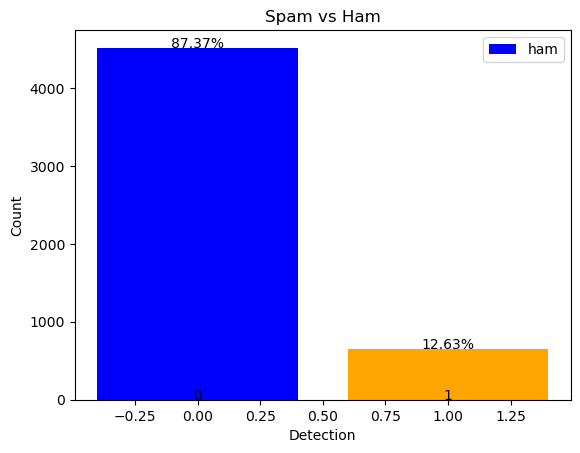

In [78]:
# Creating a bar chart
detection_counts = df['Detection'].value_counts()

# Defining custom colors for 'ham' and 'spam'
colors = ['blue', 'orange']

# Applying colors to 'ham' and 'spam' bars
bars[0].set_color(ham_color)
bars[1].set_color(spam_color)

plt.bar(detection_counts.index, detection_counts.values, color=colors)

# Adding labels and title
plt.xlabel('Detection')
plt.ylabel('Count')
plt.title('Spam vs Ham')

# Add percentages on the bars
total = sum(detection_counts.values)
for i, count in enumerate(detection_counts.values):
    percentage = (count / total) * 100
    plt.text(i, count + 0.5, f'{percentage:.2f}%', ha='center')

# Adding labels on the bars
for i, label in enumerate(detection_counts.index):
    plt.text(i, -0.5, label, ha='center', color='black')

# Adding legend
plt.legend(['ham', 'spam'])

plt.show()

In [75]:
#DATA IS IMBALANCED 
#handling Imbalanced Data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
df['Characters'] = df['SMS'].apply(len)

C:\Users\Tisha\AppData\Local\Temp\ipykernel_27644\269553215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Characters'] = df['SMS'].apply(len)


In [88]:
df.head(5)

,Detection,SMS,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [93]:
#number of words
df['Words']=df['SMS'].apply(lambda a: len(nltk.word_tokenize(a)))

C:\Users\Tisha\AppData\Local\Temp\ipykernel_27644\2465192876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Words']=df['SMS'].apply(lambda a: len(nltk.word_tokenize(a)))


In [94]:
df.head(5)

,Detection,SMS,Characters,Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [95]:
df['Sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Tisha\AppData\Local\Temp\ipykernel_27644\3289787212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [96]:
df.head()

,Detection,SMS,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [97]:
df.describe()

,Detection,Characters,Words,Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [99]:
#HAM
df[df['Detection'] == 0][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [100]:
#SPAM
df[df['Detection'] == 1][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='Words', ylabel='Count'>

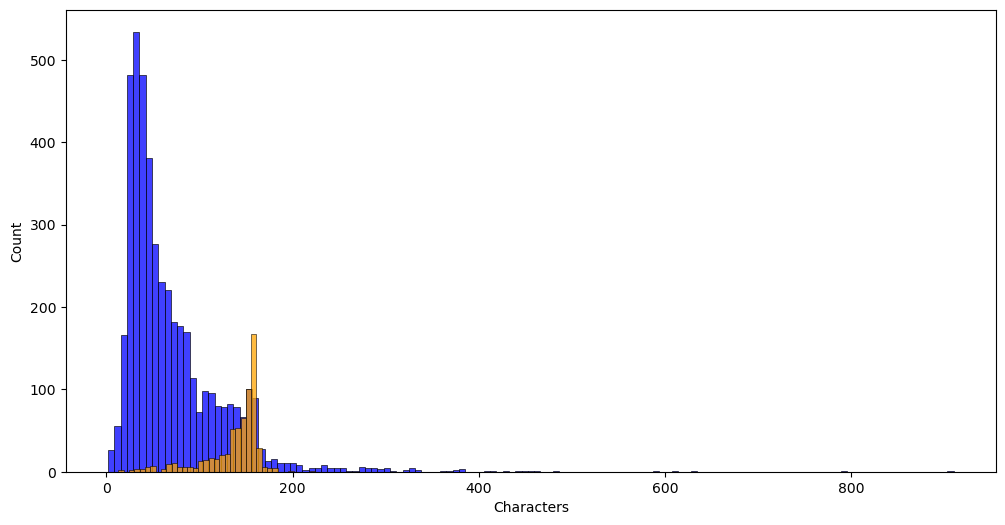

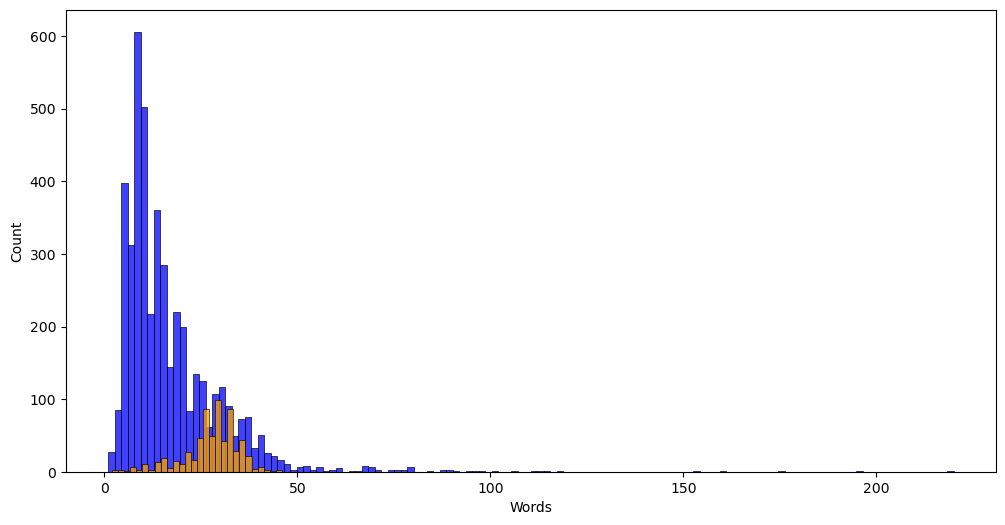

In [141]:
#plotting histogram to distinguish relationship between the sizes of 
#characters and words in spam and ham 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Detection']==0]['Characters'],color='blue')
sns.histplot(df[df['Detection']==1]['Characters'],color='orange')
plt.figure(figsize=(12,6))
sns.histplot(df[df['Detection']==0]['Words'],color='blue')
sns.histplot(df[df['Detection']==1]['Words'],color='orange')

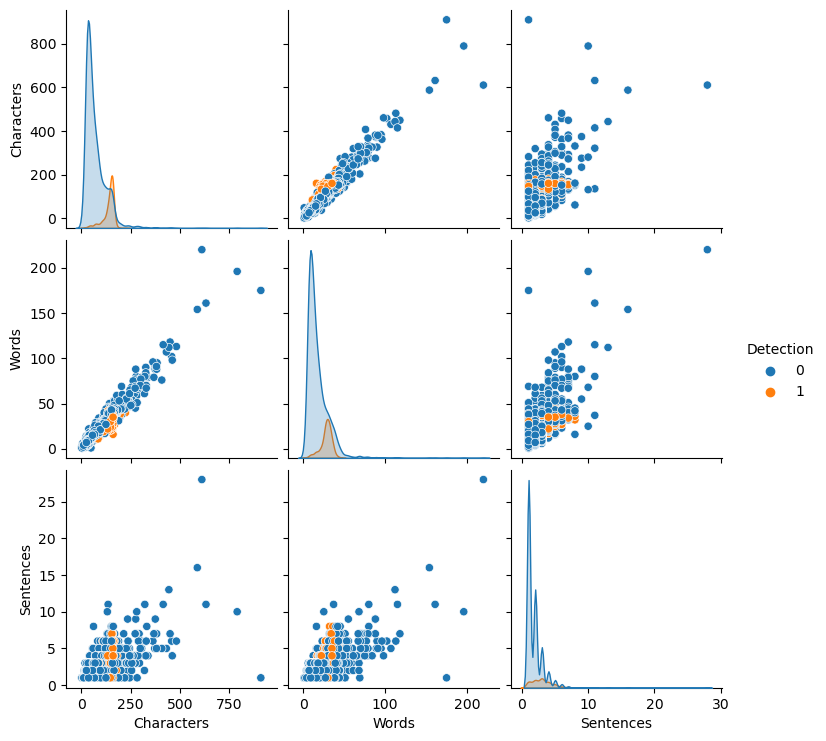

In [109]:
sns.pairplot(df,hue='Detection')

C:\Users\Tisha\AppData\Local\Temp\ipykernel_27644\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

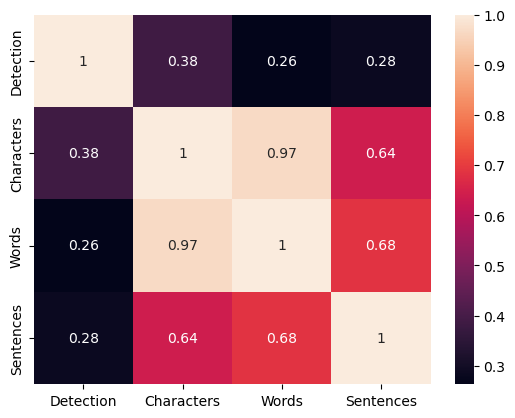

In [113]:
sns.heatmap(df.corr(),annot=True)

## C) Text Preprocessing 

In [144]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [152]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric tokens
    alphanumeric_tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stopwords and punctuation
    filtered_tokens = [token for token in alphanumeric_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Apply stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens)


In [158]:
df['SMS'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [157]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [164]:
df['transformed_SMS'] = df['SMS'].apply(transform_text)

C:\Users\Tisha\AppData\Local\Temp\ipykernel_27644\2673880551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_SMS'] = df['SMS'].apply(transform_text)


In [165]:
df.head()

,Detection,SMS,Characters,Words,Sentences,transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [173]:
from wordcloud import WordCloud

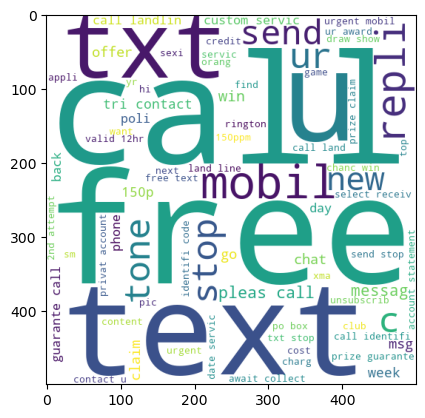

In [172]:
#generating wordcloud for spam SMS
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_WC=wc.generate(df[df['Detection']==1]['transformed_SMS'].str.cat(sep=" "))
plt.imshow(spam_WC)

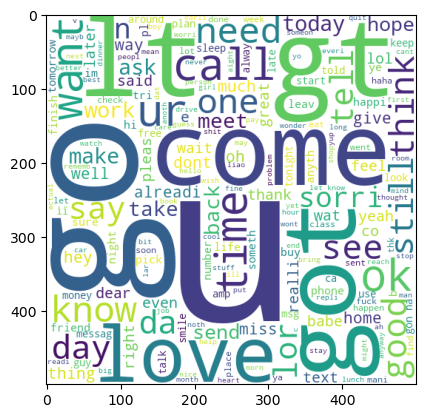

In [174]:
#for Ham SMS
Ham_WC=wc.generate(df[df['Detection']==0]['transformed_SMS'].str.cat(sep=" "))
plt.imshow(Ham_WC)

In [175]:
df.head()

,Detection,SMS,Characters,Words,Sentences,transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [178]:
spam_corpus = []
for text in df[df['Detection']==1]['transformed_SMS'].tolist():
    for word in text.split():
        spam_corpus.append(word)

In [179]:
len(spam_corpus)

9939

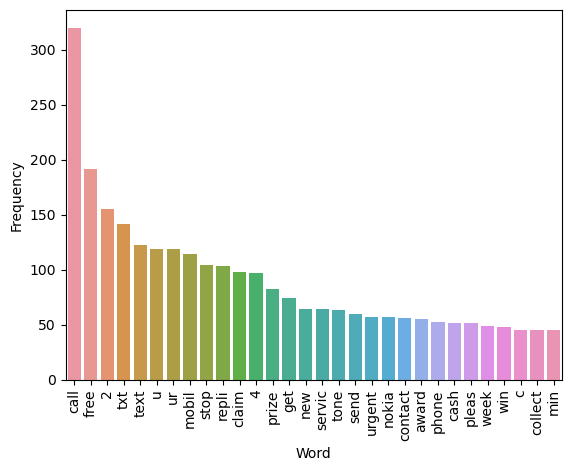

In [182]:
from collections import Counter

# Creating a Counter object to count word frequencies
word_counter = Counter(spam_corpus)

# Getting the most common 30 words and their frequencies
most_common_words = word_counter.most_common(30)

# Convert the most common words and frequencies into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
ham_corpus = []
for text in df[df['Detection']==0]['transformed_SMS'].tolist():
    for word in text.split():
        ham_corpus.append(word)

In [184]:
len(ham_corpus)

35394

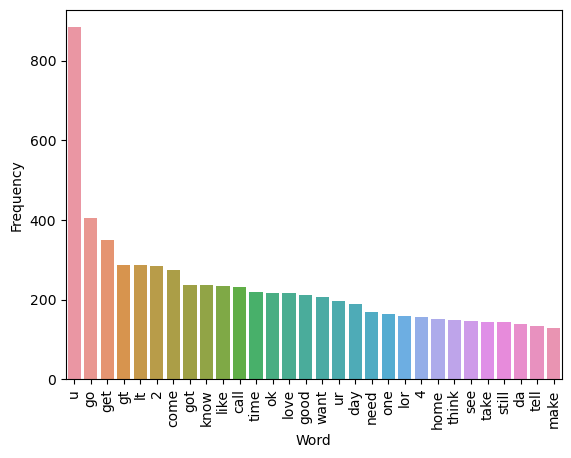

In [185]:
# Creating a Counter object to count word frequencies
word_counter = Counter(ham_corpus)

# Getting the most common 30 words and their frequencies
most_common_words = word_counter.most_common(30)

# Convert the most common words and frequencies into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

## D) Model Building

In [241]:
#Applying NAIVE BAYES classifier 
#Text Vectorization using Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [242]:
X = tf.fit_transform(df['transformed_SMS']).toarray()

In [243]:
X.shape

(5169, 3000)

In [244]:
y = df['Detection'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [245]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [246]:
#Importing the classifier here 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [247]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [248]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred1))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred1))
print("precision score:")
print(precision_score(y_test,y_pred1))

accuracy:
0.8694390715667312
Confusion matrix:
[[788 108]
 [ 27 111]]
precision score:
0.5068493150684932


In [240]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred3))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred3))
print("precision score:")
print(precision_score(y_test,y_pred3))

accuracy:
0.9835589941972921
Confusion matrix:
[[895   1]
 [ 16 122]]
precision score:
0.991869918699187


In [249]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred2))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred2))
print("precision score:")
print(precision_score(y_test,y_pred2))

accuracy:
0.9709864603481625
Confusion matrix:
[[896   0]
 [ 30 108]]
precision score:
1.0
